<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/TransformadaDeLaplace./S%26S%3ACircuitoRLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ejercicio1

import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control
sym.init_printing()

s=sym.symbols('s', complex=True)
t, R, L, C, w=sym.symbols('t R L C omega', positive=True)

#Entrada de interés en Laplace:

X=w/(s**2+w**2) #Ajustar según tipo de entrada
H=control.TransferFunction(1,(L*C)*s**2+(L*s)/R+1,s) #Función de transferencia con la API de control

#HLC=H/(1+H) para lazo cerrado:

Y=H.num*X/H.den #Función de transferencia del circuito multiplicado

#Modelo en el tiempo en función de RLC:

Ye=Y

#Se recorre cada fracción parcial según factorización para simplificar cálculos:

for j in range(len(Ye.args)):
    if j==0: #Primer elemento de la solucion
      yt=sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #Siguientes elementos concatenados
      yt+=sym.inverse_laplace_transform(Ye.args[j], s, t)

#Modelo en el tiempo con RLC evaluados:

RLC={R:1, L:sym.Rational('.5'), C:sym.Rational('.4')} #Valores utilizados para la simulación
Ye=Y.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt=sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+=sym.inverse_laplace_transform(Ye.args[j], s, t)
poles=sym.roots(sym.denom(Ye), s) #Se obtienen las raices del denominador
zeros=sym.roots(sym.numer(Ye), s) #Se obitnene las raíces del numerador
HRLC=control.TransferFunction(H.num, H.den.subs(RLC), s)
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.step_response_plot(HRLC)
control.ramp_response_plot(HRLC)

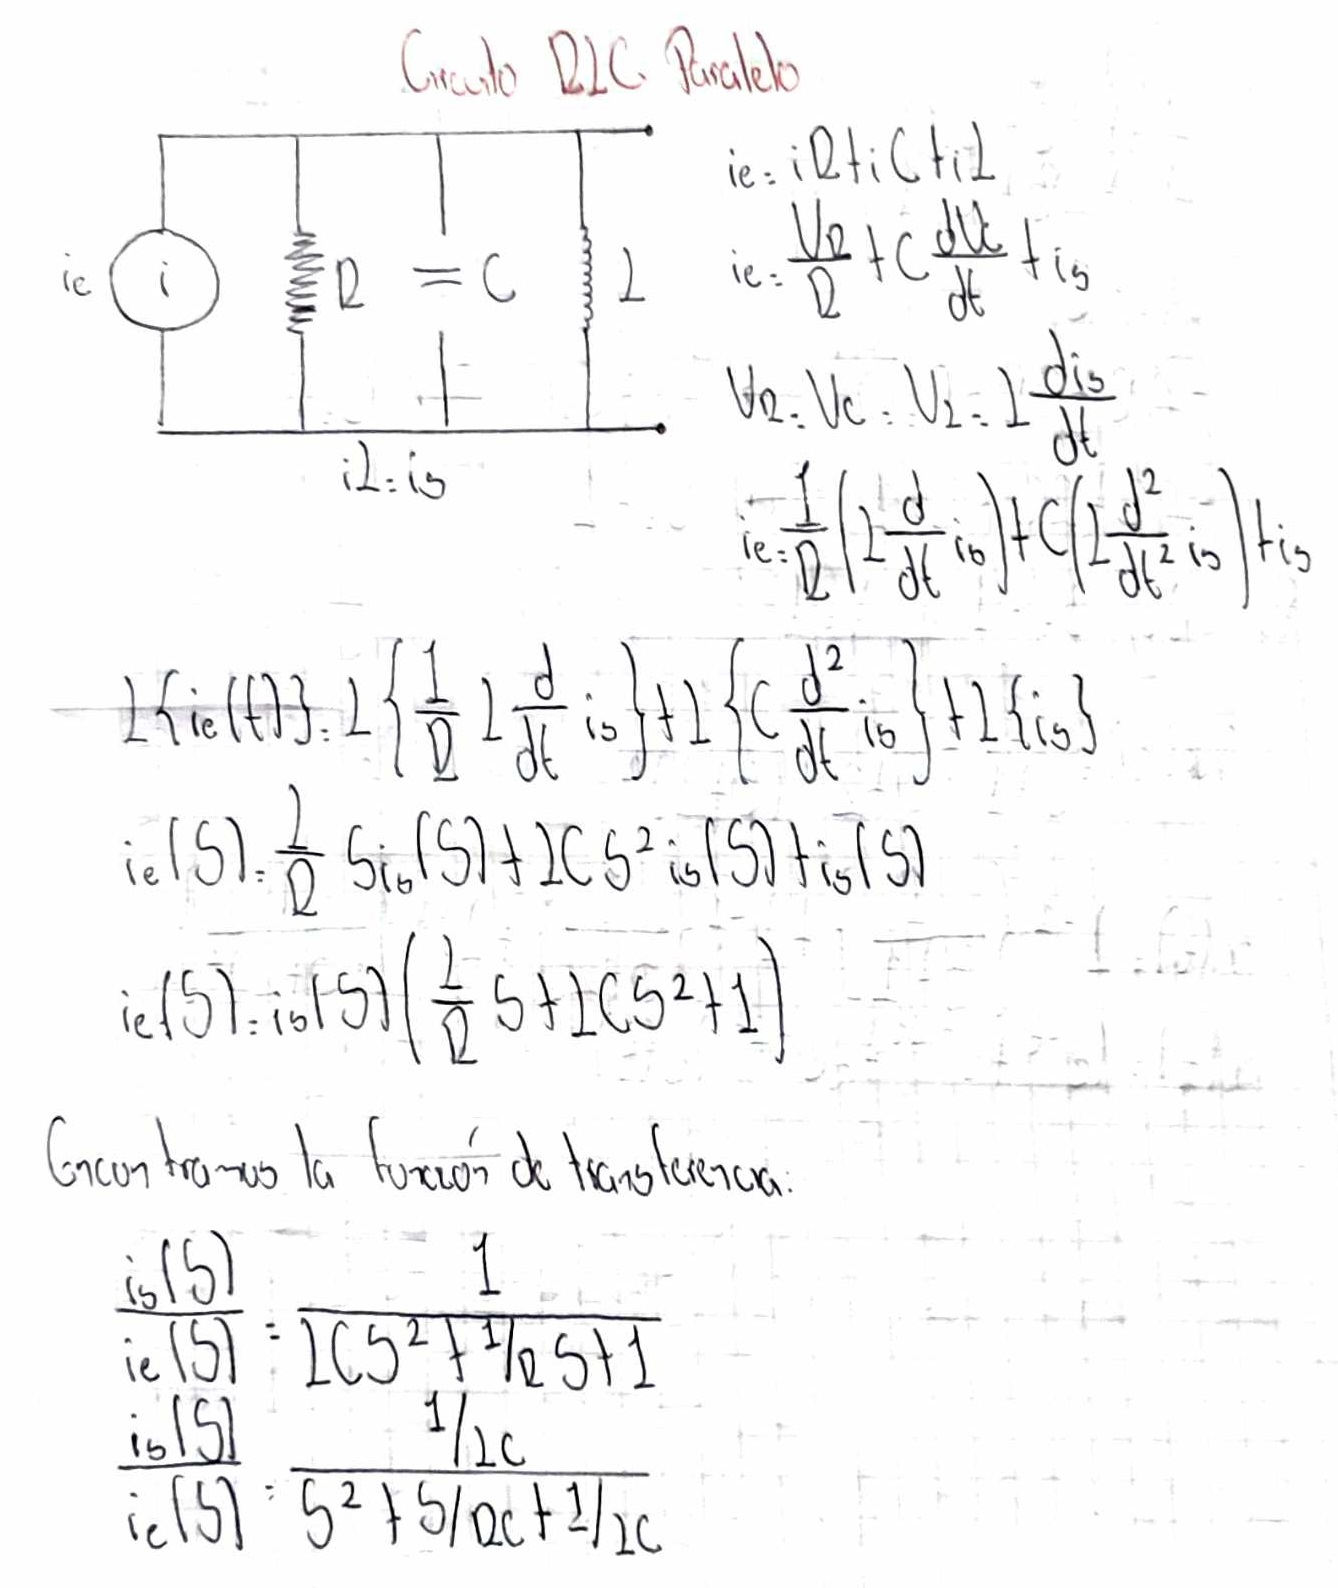